In [1]:
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

# Description
* fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines
* residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet	
* chlorides - the amount of salt in the wine
* free sulfur dioxide - between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

* total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

* density - the density of water is close to that of water depending on the percent alcohol and sugar content

* pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

* sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* alcohol
* quality

In [5]:
data = pd.read_csv('C:\\Users\\Irina\\Documents\\Python_for_analytics\\Stats\\Visualization\\Red wine quality\\winequality-red.csv')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Распределение по качеству вина')

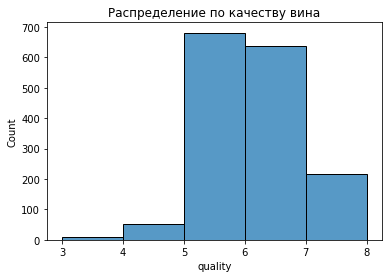

In [12]:
sns.histplot(data=data, x='quality', binwidth=1).set_title('Распределение по качеству вина')

* В данной выборке красных вин большая часть имеет оценку 6 или 7, что говорит о том, что португальское вино "Vinho Verde" скорее качественное, чем нет.
* Некачественных вин крайне мало, но и высшего качества 9-10 тоже нет.

Text(0.5, 1.0, 'Распределение вин по фиксированной кислотности и наличию цитрусовой кислоты')

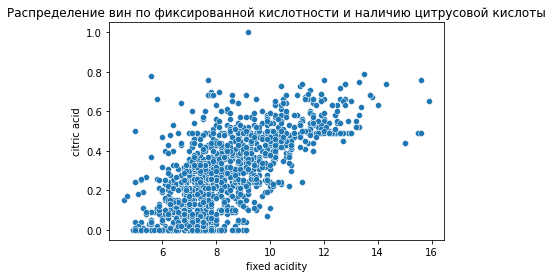

In [23]:
sns.scatterplot(data=data, x='fixed acidity', y='citric acid').set_title('Распределение вин по фиксированной кислотности и наличию цитрусовой кислоты')

* Наблюдается положительная зависимость между фиксированной кислотностью и наличием цитрусовой кислоты

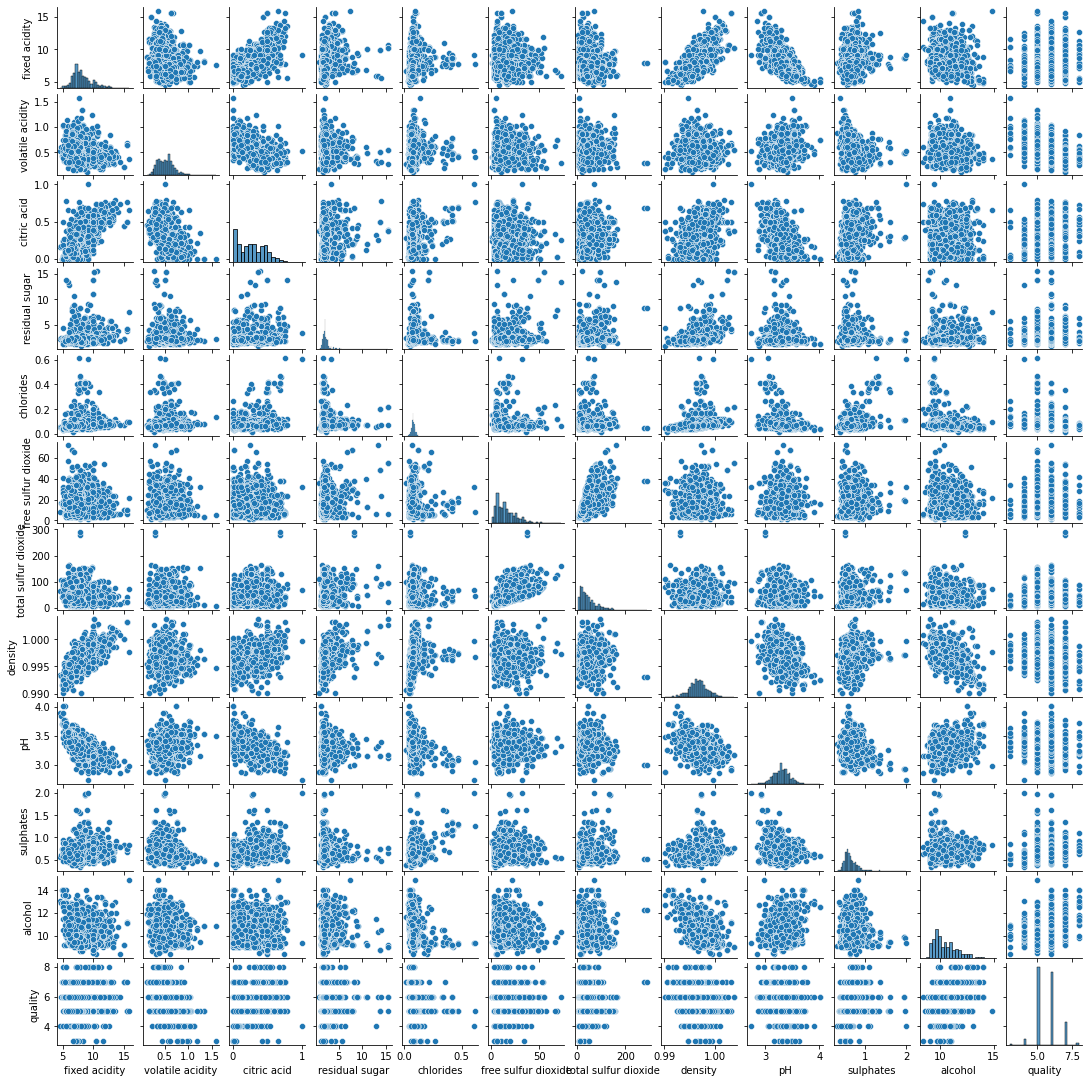

In [14]:
g = sns.pairplot(data)
g.fig.set_figheight (15)
g.fig.set_figwidth (15)

* Наблюдается зависимость между:
 * fixed acidity и  сitric acid
 * fixed acidity и density
 * fixed acidity и pH
 * volatile acidity и citric acid
 * density и alcohol
 * citric acid и pH
 * quality и alcohol
 * quality и sulphates
 
Это следует уточнить с помощью коэффициента корреляции

Text(0.5, 1.0, 'Тепловая карта')

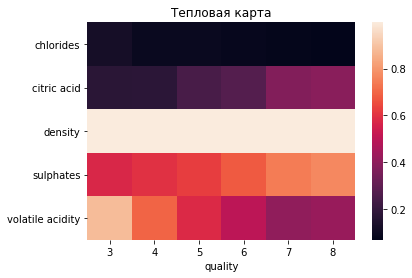

In [23]:
data_quality = data.pivot_table(columns = 'quality',
                                aggfunc = np.mean
                               )
#data_quality
sns.heatmap(data_quality.loc[['chlorides', 'citric acid', 'density', 'sulphates', 'volatile acidity']]).set_title('Тепловая карта')

* Плотность вина оказалась примерно одинаковой для вин разного качетсва
* Чем больше уксусной кислоты в вине, тем хуже его качетсво
* Чем больше сульфатов в вине, тем лучше его качество.
* Чем больше лимонной кислоты, тем лучше качество вина.

In [19]:
data_quality

quality,3,4,5,6,7,8
alcohol,9.955000,10.265094,9.899706,10.629519,11.465913,12.094444
chlorides,0.122500,0.090679,0.092736,0.084956,0.076588,0.068444
citric acid,0.171000,0.174151,0.243686,0.273824,0.375176,0.391111
density,0.997464,0.996542,0.997104,0.996615,0.996104,0.995212
fixed acidity,8.360000,7.779245,8.167254,8.347179,8.872362,8.566667
free sulfur dioxide,11.000000,12.264151,16.983847,15.711599,14.045226,13.277778
pH,3.398000,3.381509,3.304949,3.318072,3.290754,3.267222
residual sugar,2.635000,2.694340,2.528855,2.477194,2.720603,2.577778
sulphates,0.570000,0.596415,0.620969,0.675329,0.741256,0.767778
total sulfur dioxide,24.900000,36.245283,56.513950,40.869906,35.020101,33.444444


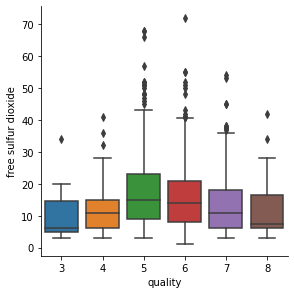

In [46]:
ax = sns.catplot(x="quality", y="free sulfur dioxide", data=data, kind="box",height=4)

* Больше всего выбросов в данных приходится на вина среднего качетсва, возможно это связано с количеством таких вин в выборке: подтверждение ниже
* Медианные значения у вин 3 и 8 качетсва максимально приближены к первому квартилю.
* У вин среднего качества минимальное и максимальное значения гораздо больше удалены друг от друга, чем у вин низкого качества и высокого


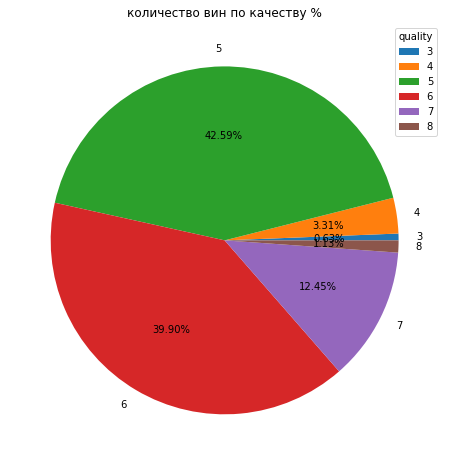

In [17]:
new = data.groupby('quality').count()
chart = (new['pH']/data['quality'].count()*100).plot(kind='pie', title = 'количество вин по качеству %', ylabel = '', figsize=(8, 8), autopct='%1.2f%%')
chart.legend(title="quality", loc="upper right")

* 83% данных представлены винами качества 5 и 6, т.е. среднего. Что говорит о том, что португальские красные вина скорее среднего каачества.
* При этом более 12% вин высокого качества.